We would like to view a detailed taxonomic breakdown of all 8 samples to see how the gut microbiota changes across the days following birth

## Step 1: Investigate the taxonomic profile of the reads

In [20]:
def dict_maker(num):
    f = open("week13_data/KRAKEN/SRR4921"+num+".kraken")
    kraken = f.readlines()
    f.close()
    day_temp = {}
    for line in kraken:
        key = line.split('\t')[1]
        day_temp.setdefault(key,0)
        day_temp[key] += 1
    return day_temp

In [23]:
kraken_83 = dict_maker("83")
kraken_86 = dict_maker("86")
kraken_88 = dict_maker("88")
kraken_89 = dict_maker("89")
kraken_90 = dict_maker("90")
kraken_93 = dict_maker("93")
kraken_94 = dict_maker("94")
kraken_97 = dict_maker("97")

In [30]:
def file_maker(dictionary):
    for x in range(0, 8):
        f = open("week13_data/KRAKEN/day" + str(x) + ".kraken", "w")
        for key, value in dictionary.items():
            test = key.split(";")
            f.write(str(value) + "\t")
            for y in test[:-1]:
                f.write(y +"\t")
            f.write(test[-1])
        f.close()

In [31]:
day1 = file_maker(kraken_83)
day2 = file_maker(kraken_86)
day3 = file_maker(kraken_88)
day4 = file_maker(kraken_89)
day5 = file_maker(kraken_90)
day6 = file_maker(kraken_93)
day7 = file_maker(kraken_94)
day8 = file_maker(kraken_97)

## Question 1: Briefly comment on the trends you see in the gut microbiota throughout the first week.

- Answer There are no large differences in the identity of the bacterium but the percentage they make chungs significantly 

## Step 2: Deconvolute the assembled scaffolds into individual genomes (binning)

In [ ]:
conda create -n metabat2 -c bioconda metabat2=2.13 libdeflate=1.0 # to run jgi_summarize_bam_contig_depths

In [ ]:
conda create -n metabat -c bioconda metabat2 # to run metabat2

In [ ]:
bwa index assembly.fasta 

## Question 2: What metrics in the contigs can we use to group them together?
- use kmer counting as metric 

In [ ]:
jgi_summarize_bam_contig_depths --outputDepth depth.txt *.bam # generate a depth file 

In [ ]:
metabat2 -i assembly.fasta -a depth.txt -o bins

## Question 3:
1) 6 bins were created 
2) represent ~34% of the assembly 
3) the average bacterial genome is 3Mb; on average the nodes were ~2-3mb; so yes I think they look right 
4) compare to a reference 

## Step 3: Estimate the taxonomy of your putative genomes

In [ ]:
tar xopf foo.tar

In [9]:
assembly_kraken = open("week13_data/KRAKEN/assembly.kraken")
assembly_kraken = assembly_kraken.readlines()


In [58]:
for line in assembly_kraken:
    line = line.split("\t")
    assembly.append(line)
    
    

In [59]:

def bin_identifier(bin_num, assembly):
    f = open("week13_data/bins/bin."+bin_num+".fa")
    binfile = f.readlines()
    f.close()
    
    bin_dict = {}
    for line in binfile:
        if '>' in line:
            node = str(line.strip()[1:])
            for line in assembly_kraken:
                if node in line:
                    key = line.split('\t')[1]
                    bin_dict.setdefault(key,0)
                    bin_dict[key] += 1
    
    f = open("week13_data/bins/bin_species"+bin_num+".txt",'w')
    for key,val in bin_dict.items():
        #x = key.split(';')
        f.write(key + '\n')
        f.write(str(val)+'\n')
        f.write('\n')
    max_key = max(bin_dict, key=lambda k: bin_dict[k])
    f.write('\nMost likely associated species:\t'+max_key)Step 4: Make a heatmap of the individual bin abundances over time

    f.close()

In [60]:
bin_nums = ['1','2','3','4','5','6','7','8']
for number in bin_nums:
    bin_identifier(number,assembly)

## Question 4:

## Step 4: Make a heatmap of the individual bin abundances over time

In [67]:
import pandas as pd
abundance = pd.read_csv("week13_data/abundance_table.tab", "\t", index_col= "Genomic bins")
abundance

,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
Genomic bins,,,,,,,,,,,,,,,,,,
bin.1,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
bin.4,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
bin.2,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
bin.5,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
bin.6,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
bin.7,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
bin.8,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
bin.3,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [86]:
abundance.rename(index = {'bin.1':'Staphylococcus haemolyticus', 'bin.4':'Enterococcus faecalis', 'bin.2':'Leuconostoc citreum', 'bin.5':'Cutibacterium avidum','bin.6':'Staphylococcus epidermidis', 'bin.7':'Staphylococcus aureus','bin.8':'Anaerococcus prevotii', 'bin.3':'Staphylococcus lugdunensis'}, inplace = True)
abundance

bins_select_df = abundance[['SRR492183','SRR492186','SRR492188','SRR492189', 'SRR492190','SRR492193','SRR492194','SRR492197']]
bins_select_df.rename(columns = {'SRR492183':'day1', 'SRR492186':'day2', 'SRR492188':'day3','SRR492189':'day4','SRR492190':'day5','SRR492193':'day6','SRR492194':'day7','SRR492197':'day8'}, inplace=True)

bins_select_df


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day1,day2,day3,day4,day5,day6,day7,day8
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,167.273691,102.432386,97.521190,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9348.741359,8139.870719,8308.156703,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,8.887730,5.838109,5.929623,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.552469,0.875860,0.356678,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,820.872805,1033.761424,999.273162,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,1.452063,1.347894,0.747525,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii,0.186461,0.065351,4.223711,0.979570,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.194380,0.475050,0.333899,0.491073,78.291586,6.639770,10.595311


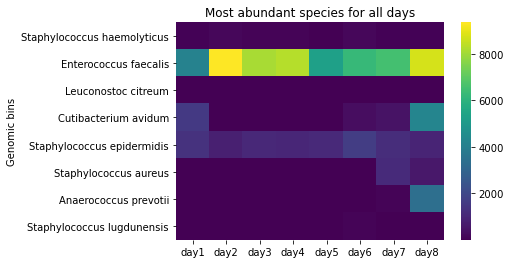

In [90]:
import seaborn as sb 
import matplotlib.pyplot as plt

ax = plt.axes()
sb.heatmap(bins_select_df, ax = ax,cmap = 'viridis')
ax.set_title('Most abundant species for all days')
plt.show()

## Question 5: Compare the results of the individual genome 
abundance analysis to the conclusions you derived from looking at 
the read taxonomy distributions (from Step 1). Do they agree with each other? What is different?

The species that were present in the visuals are the same as those in the heatmap; however, the abundance changes are different. 